# Base Ball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to 
develop an algorithm that predicts the number of wins for a given team in the 2015 
season based on several different indicators of success

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

Data Collection and Preprocession

In [2]:
base_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
base_data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# Checking the Shape of the dataset.

base_data.shape

(30, 17)

There are total 30 Rows and 17 Columns in the dataset.

In [4]:
# Checking the Dataset summary/info.

base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Here there are 16 columns have integer values and 1 has float value.

# Exploratory Data Analysis(EDA)

In [5]:
# Checking the data types of each column.

base_data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Here Only ERA column has float datatype otherwise all others are int.

In [6]:
# Checking the null/missing values in the dataset.

base_data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values present in the dataset.

In [7]:
# Checking the unique values.

base_data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

Here each column has unique values.

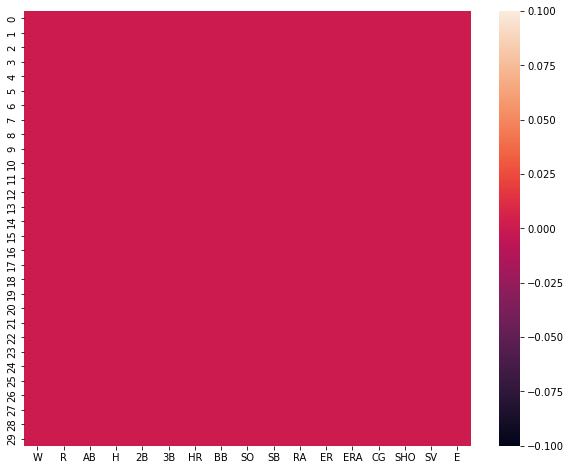

In [8]:
# Visualizing the null values using heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(base_data.isnull())
plt.show()

After visualization we can definitely say that there are no null values present in the dataset.

In [9]:
# Checking teh Statistical summary of the dataset.

base_data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Here the total count is 30,some columns have higher mean,std.deviation,min value and max value whereas some columns have lower.

# Data Visualization

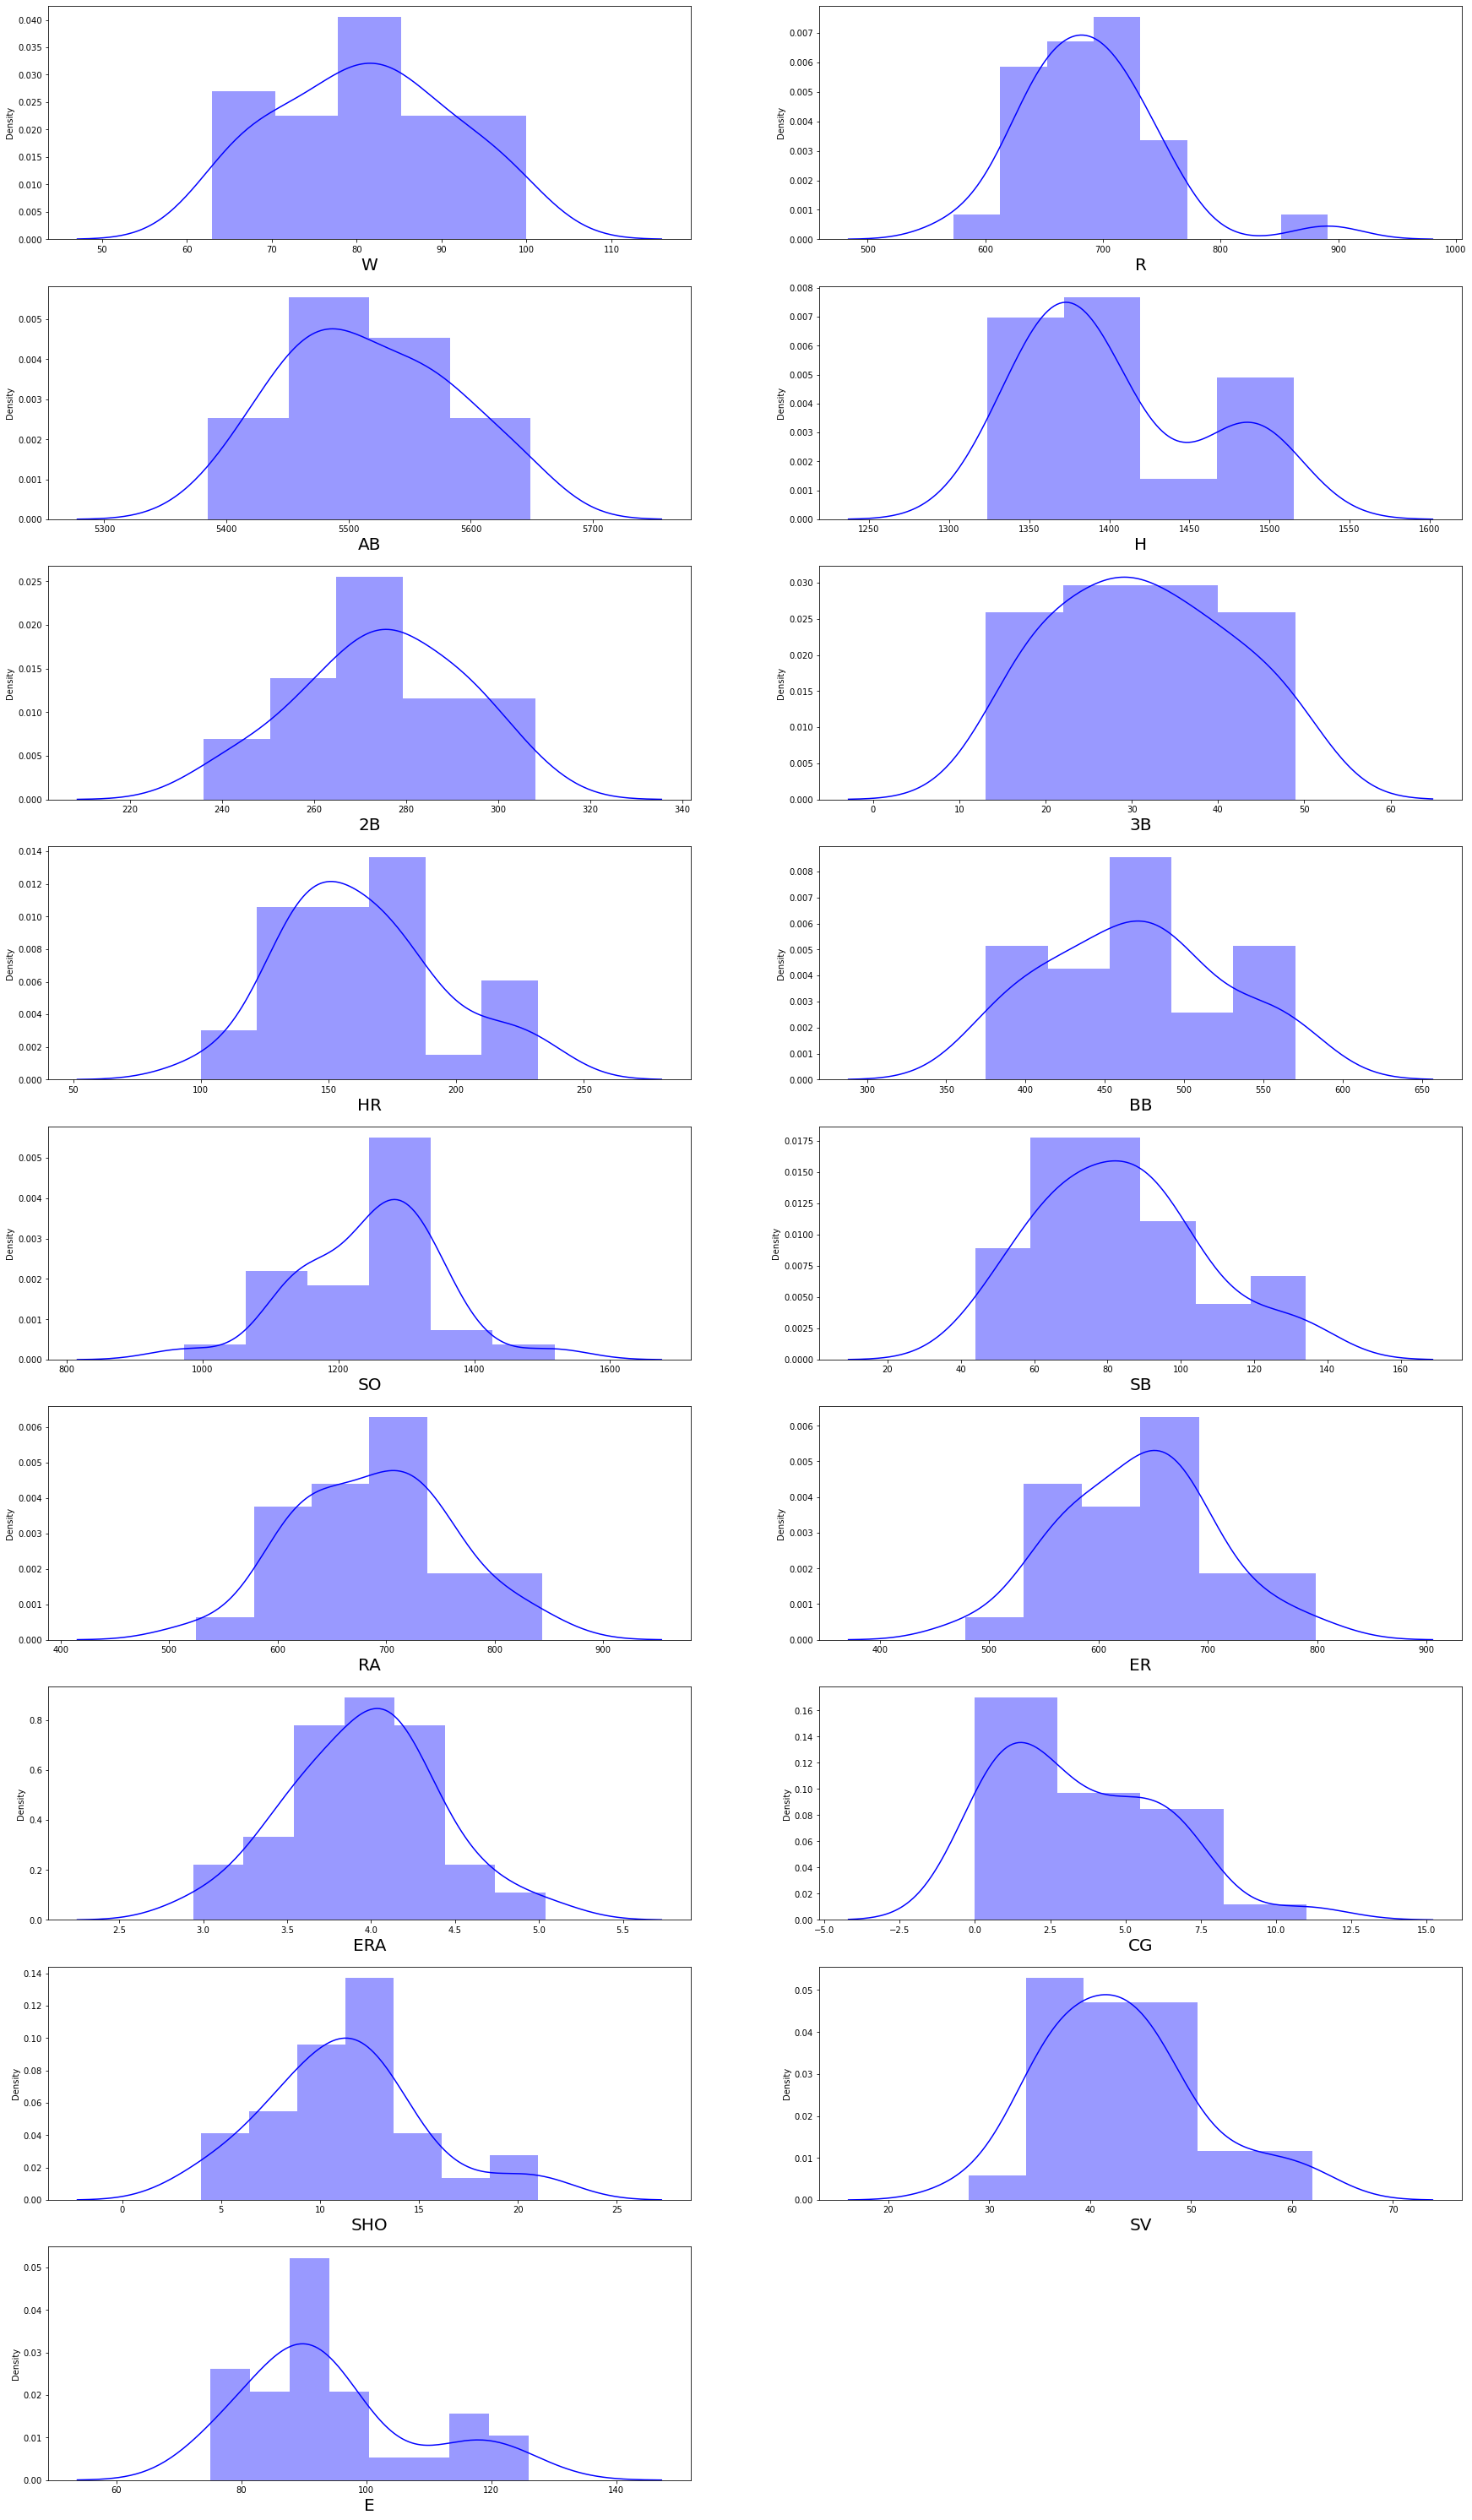

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Visualizing each feature and target column using ditributin plot.

plt.figure(figsize=(30,60),facecolor='white')
plotnumber=1
 
for column in base_data:
    if plotnumber<=17:
        ax=plt.subplot(10,2,plotnumber)
        sns.distplot(base_data[column],color='blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1   
plt.show()        

All columns are nearly shows normal distribution except R,SO,CG and E. 

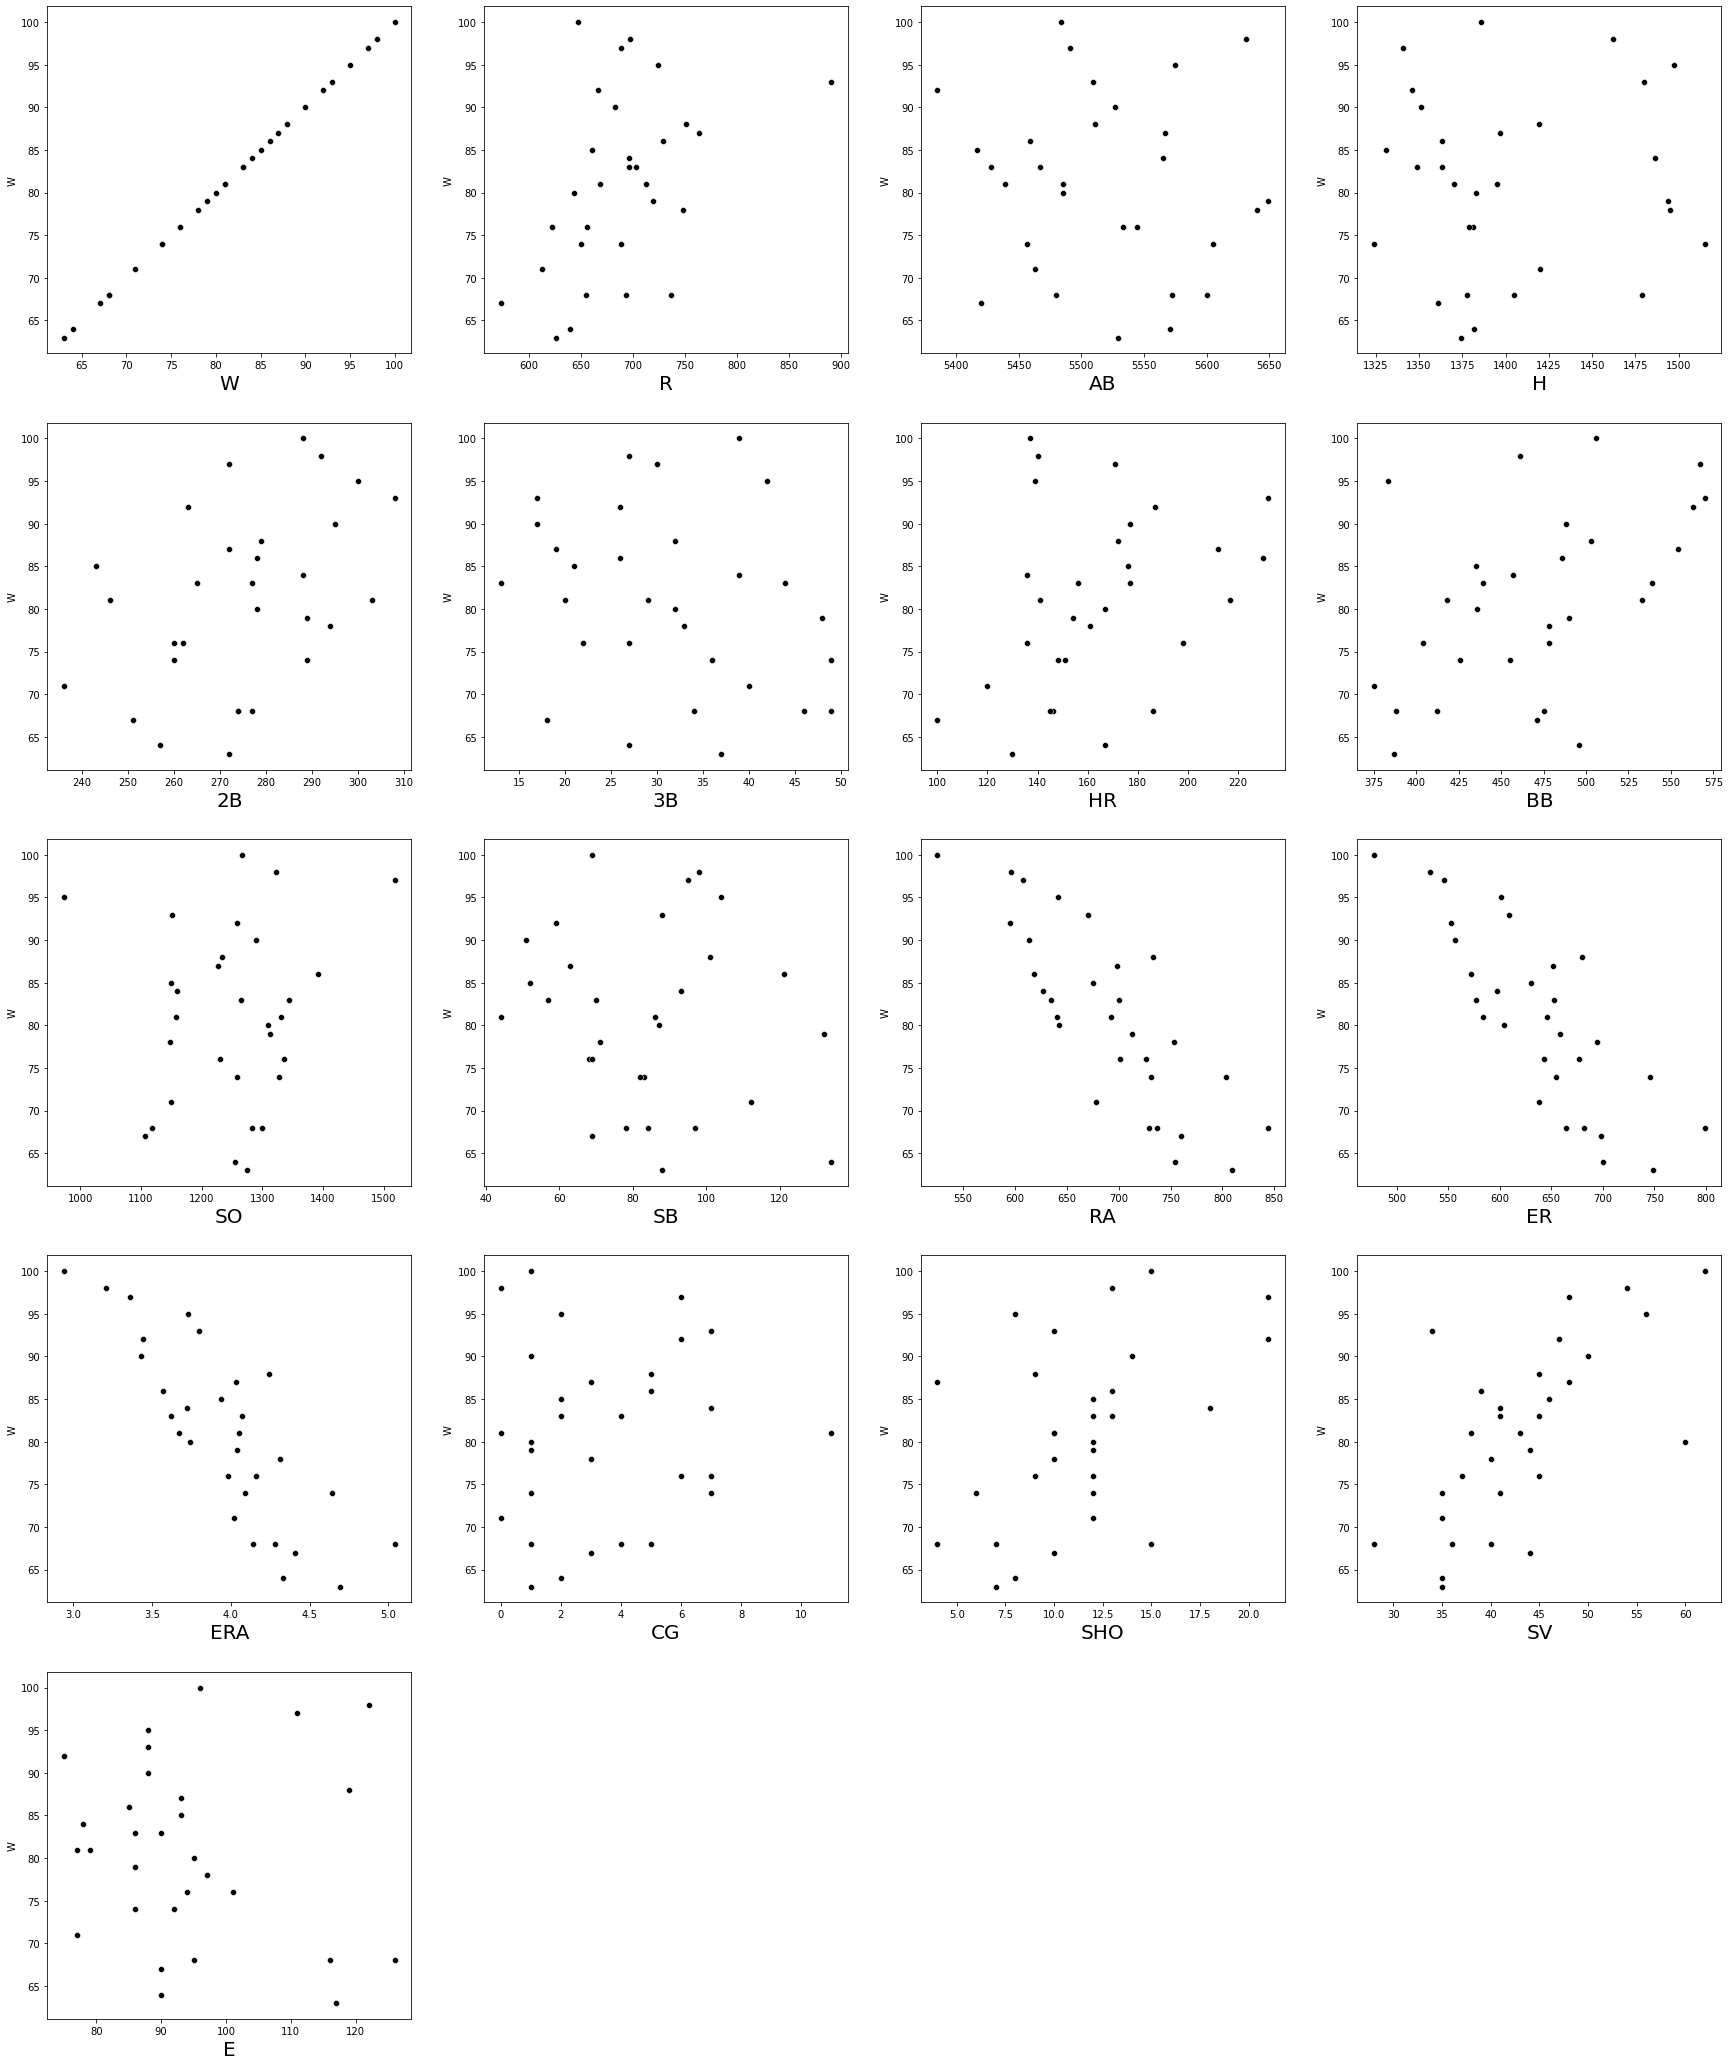

In [11]:
# Visualizing the features against target column using scatter plot.

plt.figure(figsize=(30,60),facecolor='white')
plotnumber=1
 
for column in base_data:
    if plotnumber<=20:
        ax=plt.subplot(8,4,plotnumber)
        sns.scatterplot(base_data[column],base_data['W'],color='black')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W')
    plotnumber+=1   
plt.show()        

Here we see that column ERA,SHO,SV,SO and R have somehow linear relationship with target column but other feature columns have data points too much scattered that means they don't have linear relationship withtarget column.

 Checking Each Feature column against target column seperately using scatterplot.


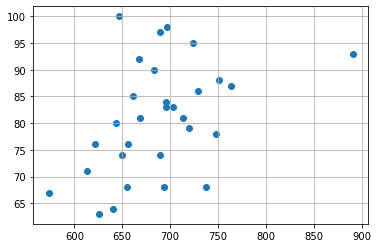

In [12]:
# Feature column 'R' vs target column 'W'.
plt.scatter(x = base_data['R'], y = base_data['W'])
plt.grid(True)

Here we can see some what linear relationship bet 'R' and 'W'.

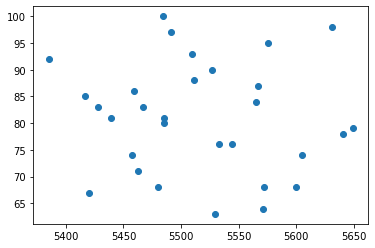

In [13]:
# Feature column 'AB' vs target column 'W'.

plt.scatter(x = base_data['AB'], y = base_data['W'])
plt.grid(False)

Here data points are too much scattered in different directions thus don't showing any relationship.

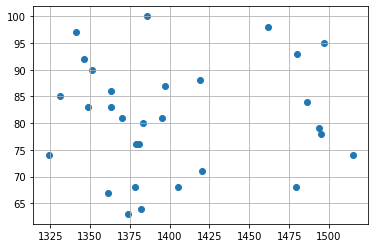

In [14]:
# Feature column 'AB' vs target column 'W'.


plt.scatter(x = base_data['H'], y = base_data['W'])
plt.grid(True)

Here data points are too much scattered in different directions thus don't showing any relationship.

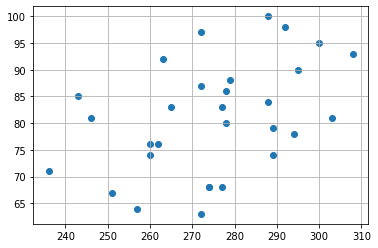

In [15]:
# Feature column '2B' vs target column 'W'.

plt.scatter(x = base_data['2B'], y = base_data['W'])
plt.grid(True)

Here data points are too much scattered in different directions thus don't showing any relationship.

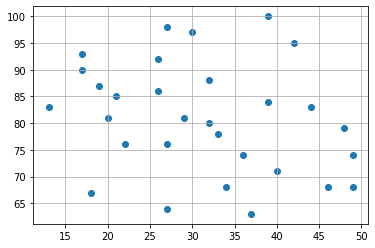

In [16]:
# Feature column '2B' vs target column 'W'.

plt.scatter(x = base_data['3B'], y = base_data['W'])
plt.grid(True)

Here data points are too much scattered in different directions thus don't showing any relationship.

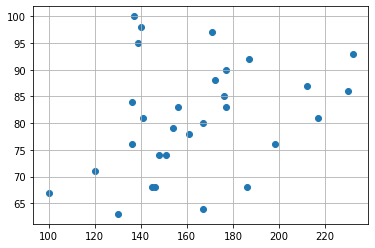

In [17]:
# Feature column 'HR' vs target column 'W'.

plt.scatter(x = base_data['HR'], y = base_data['W'])
plt.grid(True)

Here data points are too much scattered in different directions thus don't showing any relationship.

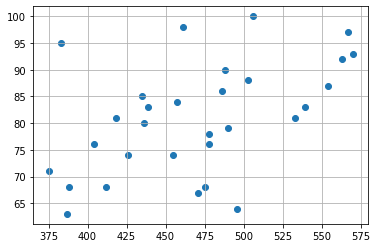

In [18]:
# Feature column 'BB' vs target column 'W'.

plt.scatter(x = base_data['BB'], y = base_data['W'])
plt.grid(True)

Here we see some what linear relationship between both feature and target column.

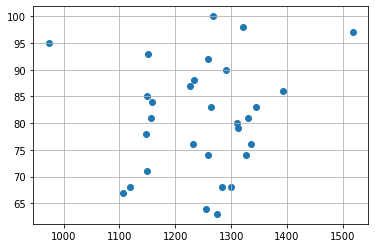

In [19]:
# Feature column 'SO' vs target column 'W'.

plt.scatter(x = base_data['SO'], y = base_data['W'])
plt.grid(True)

Here we see some what linear relationship between both feature and target column.

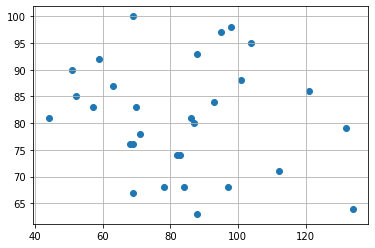

In [20]:
# Feature column 'SB' vs target column 'W'.

plt.scatter(x = base_data['SB'], y = base_data['W'])
plt.grid(True)

Here data points are too much scattered in different directions thus don't showing any relationship.

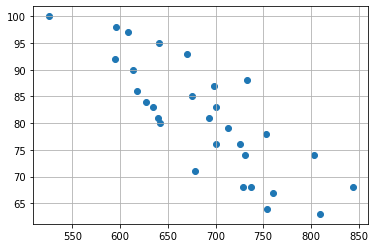

In [21]:
# Feature column 'RA' vs target column 'W'.

plt.scatter(x = base_data['RA'], y = base_data['W'])
plt.grid(True)

Here data points of feature and target columns shows linear relationship.

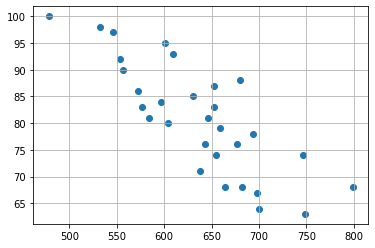

In [22]:
# Feature column 'ER' vs target column 'W'.

plt.scatter(x = base_data['ER'], y = base_data['W'])
plt.grid(True)

Here we see some what linear relationship between both feature and target column.

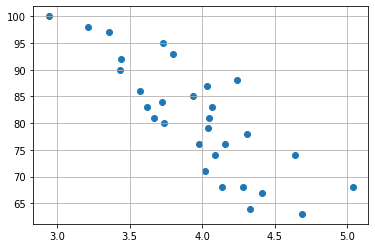

In [23]:
# Feature column 'ERA' vs target column 'W'.

plt.scatter(x = base_data['ERA'], y = base_data['W'])
plt.grid(True)

Here we see some what linear relationship between both feature and target column.

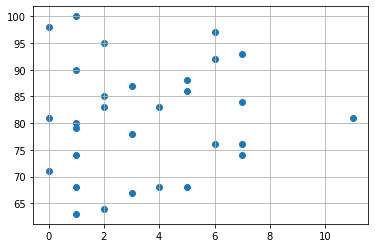

In [24]:
# Feature column 'CG' vs target column 'W'.

plt.scatter(x = base_data['CG'], y = base_data['W'])
plt.grid(True)

Here data points are too much scattered in different directions thus don't showing any relationship.

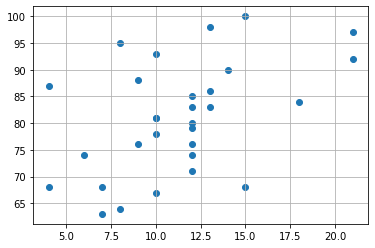

In [25]:
# Feature column 'SHO' vs target column 'W'.

plt.scatter(x = base_data['SHO'], y = base_data['W'])
plt.grid(True)

Here we see some what linear relationship between both feature and target column.

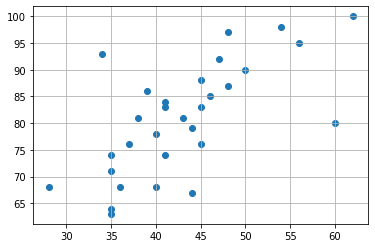

In [26]:
# Feature column 'SV' vs target column 'W'.

plt.scatter(x = base_data['SV'], y = base_data['W'])
plt.grid(True)

Here we see some what linear relationship between both feature and target column.

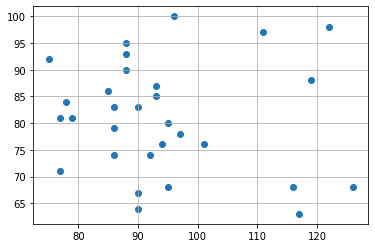

In [27]:
# Feature column 'E' vs target column 'W'.

plt.scatter(x = base_data['E'], y = base_data['W'])
plt.grid(True)

Here data points are too much scattered in different directions thus don't showing any relationship.

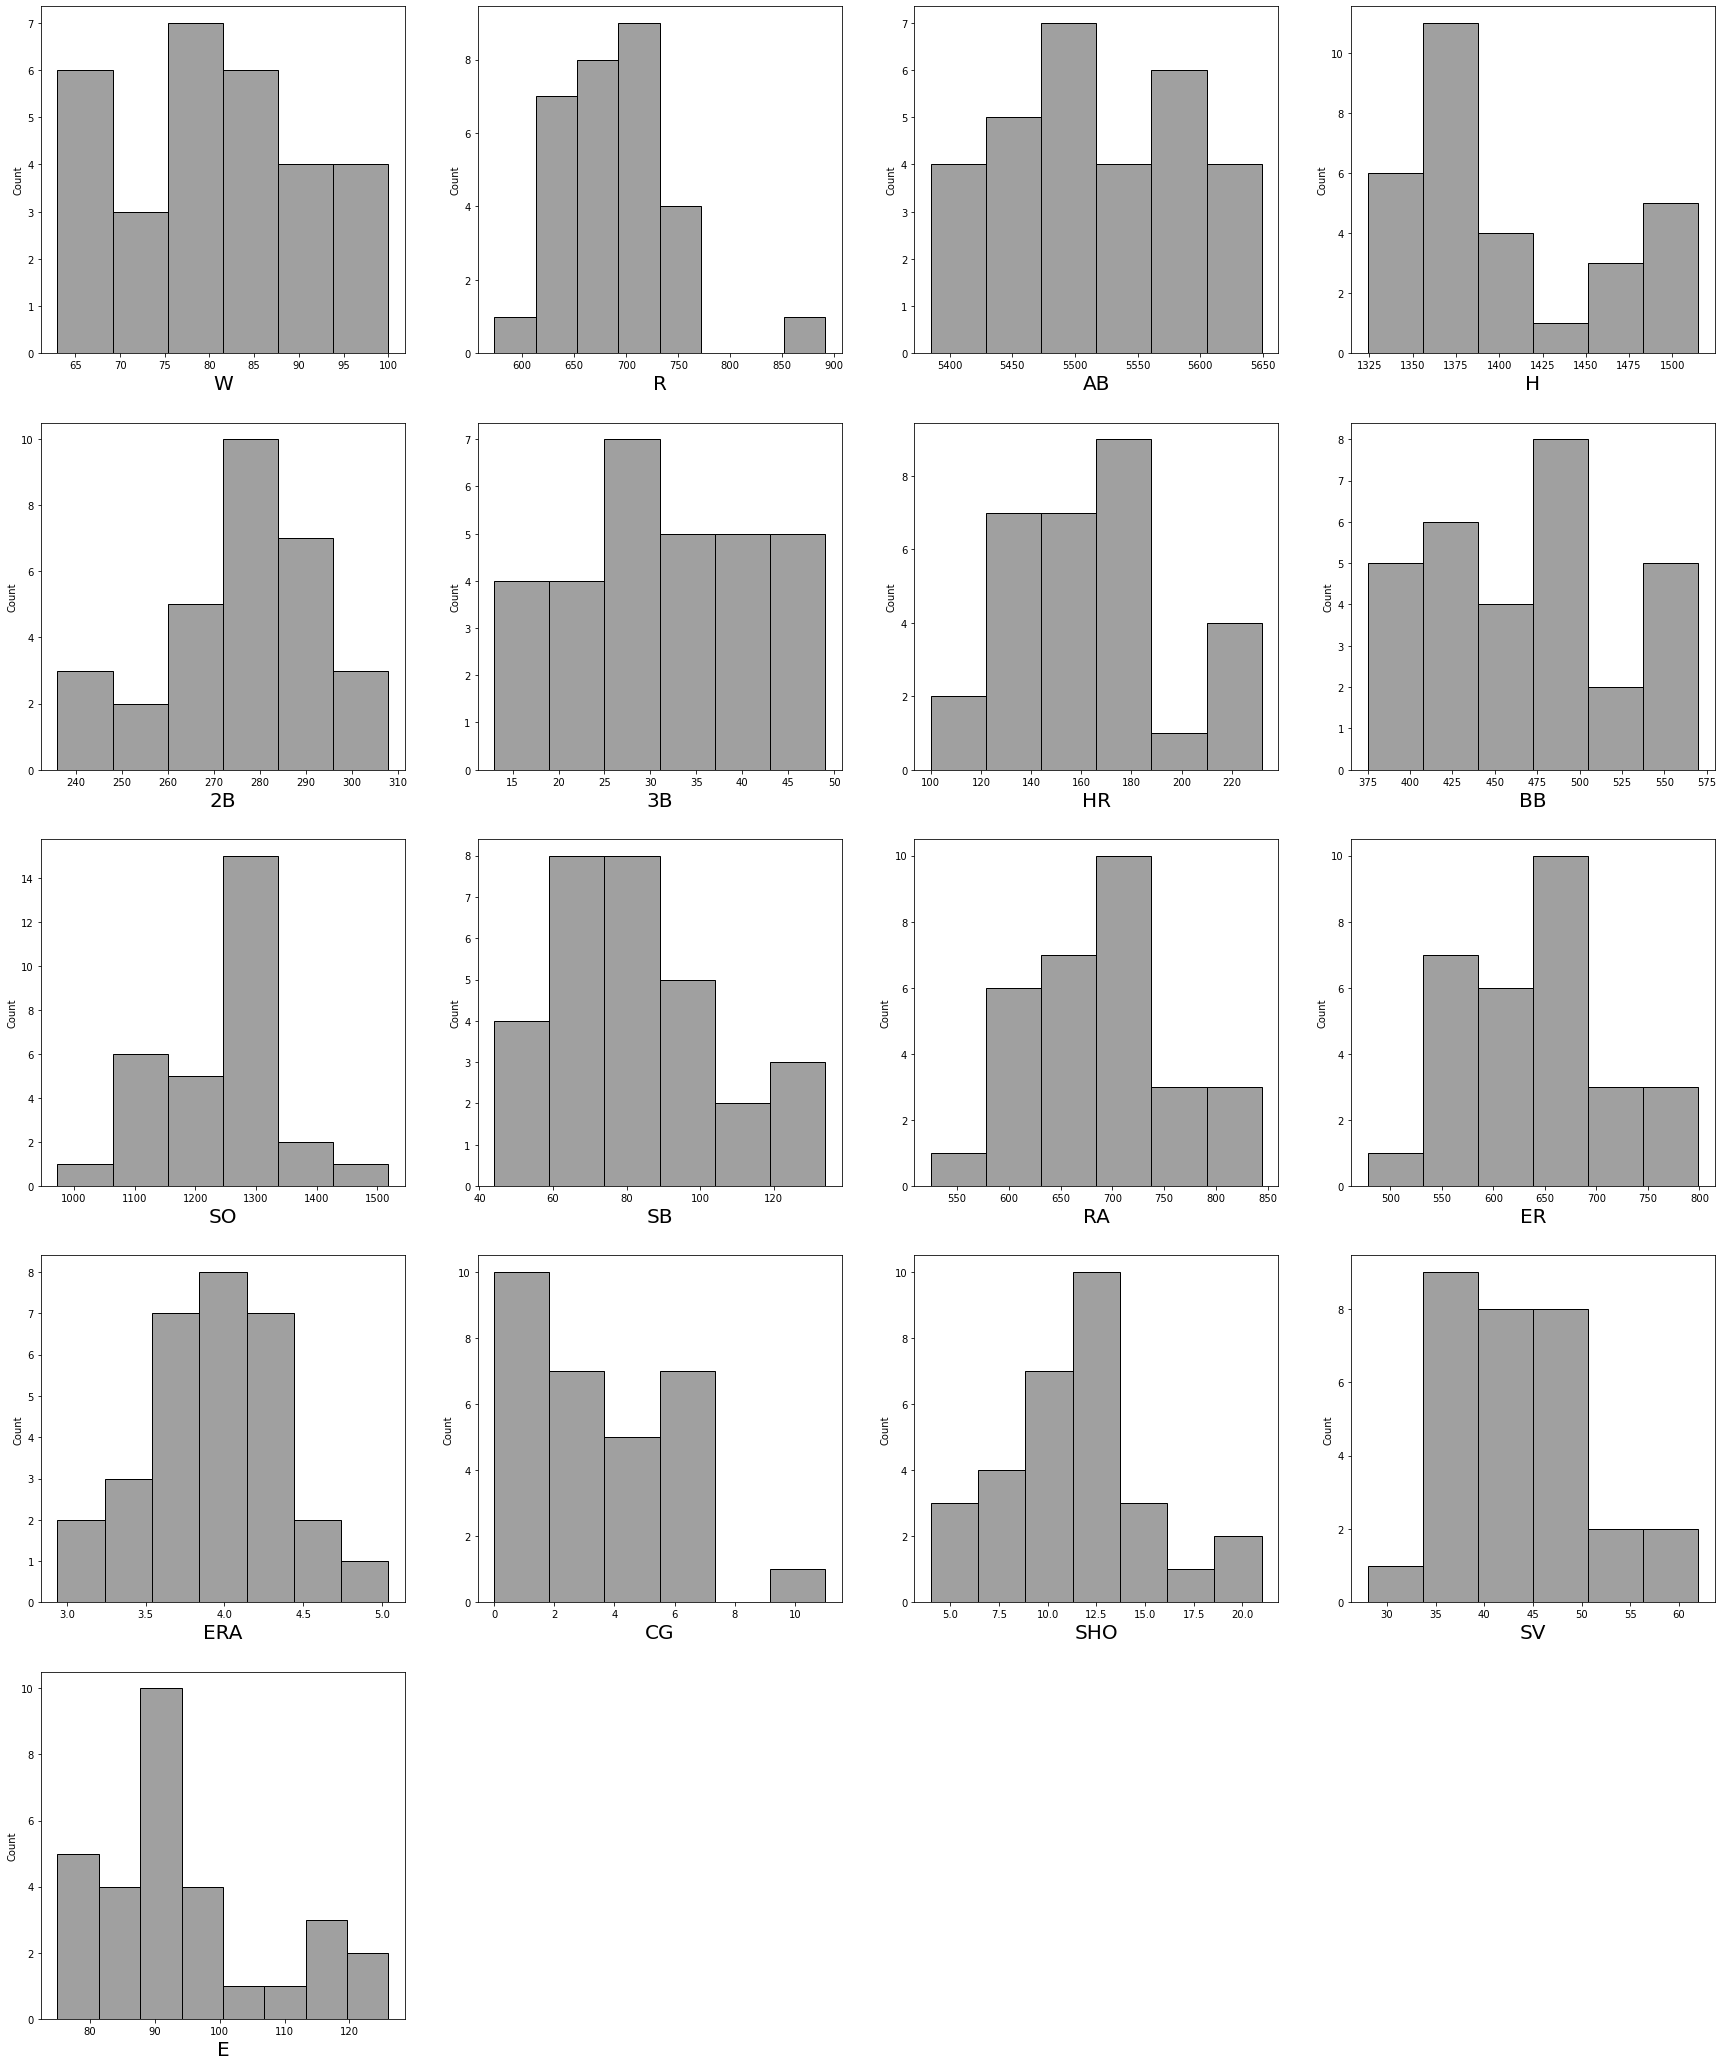

In [28]:
#  Checking the features and target columns using histogram plot.

plt.figure(figsize=(30,60),facecolor='white')
plotnumber=1
 
for column in base_data:
    if plotnumber<=20:
        ax=plt.subplot(8,4,plotnumber)
        sns.histplot(base_data[column],color='grey')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1   
plt.show()      

<Figure size 1440x2880 with 0 Axes>

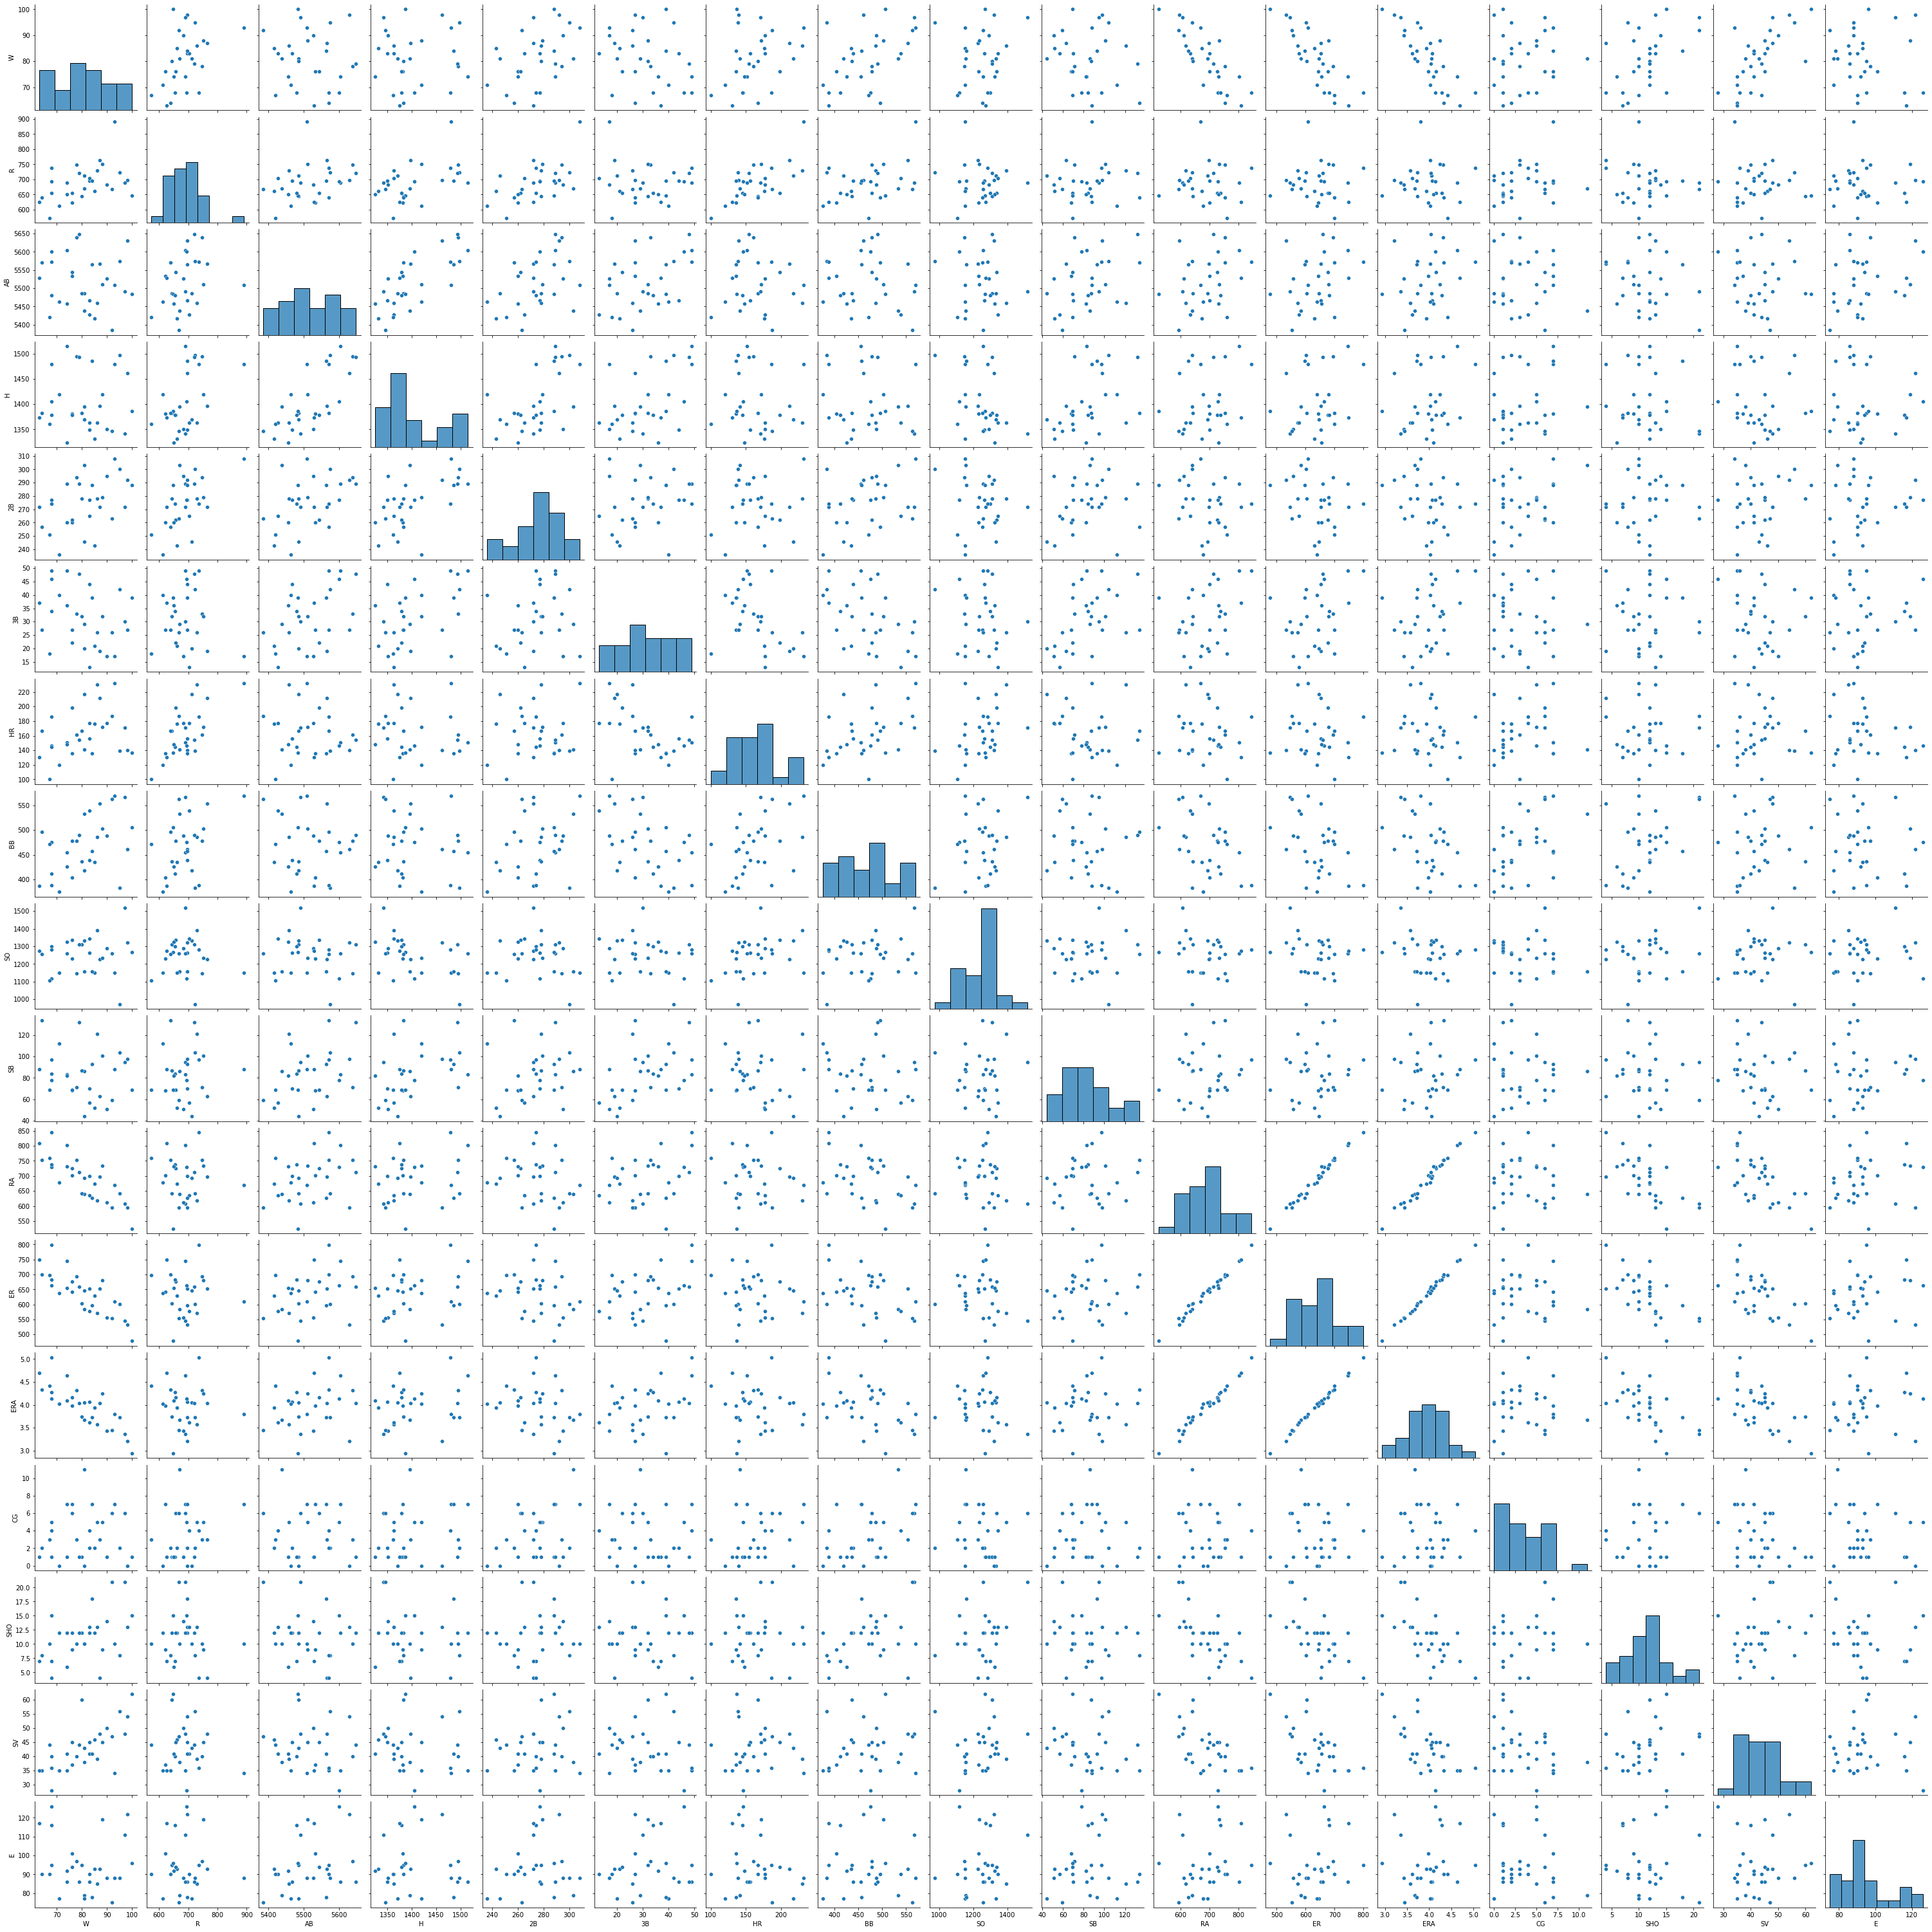

In [29]:
# Visualizing the pairwise relationship between columns.

plt.figure(figsize=(20,40))
sns.pairplot(base_data)
plt.show()

A pairplot plot shows a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. Here some column shows scattered data plots and some shows linearly spread data points.

Checking the Correlation between datasets.

In [30]:
base_data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


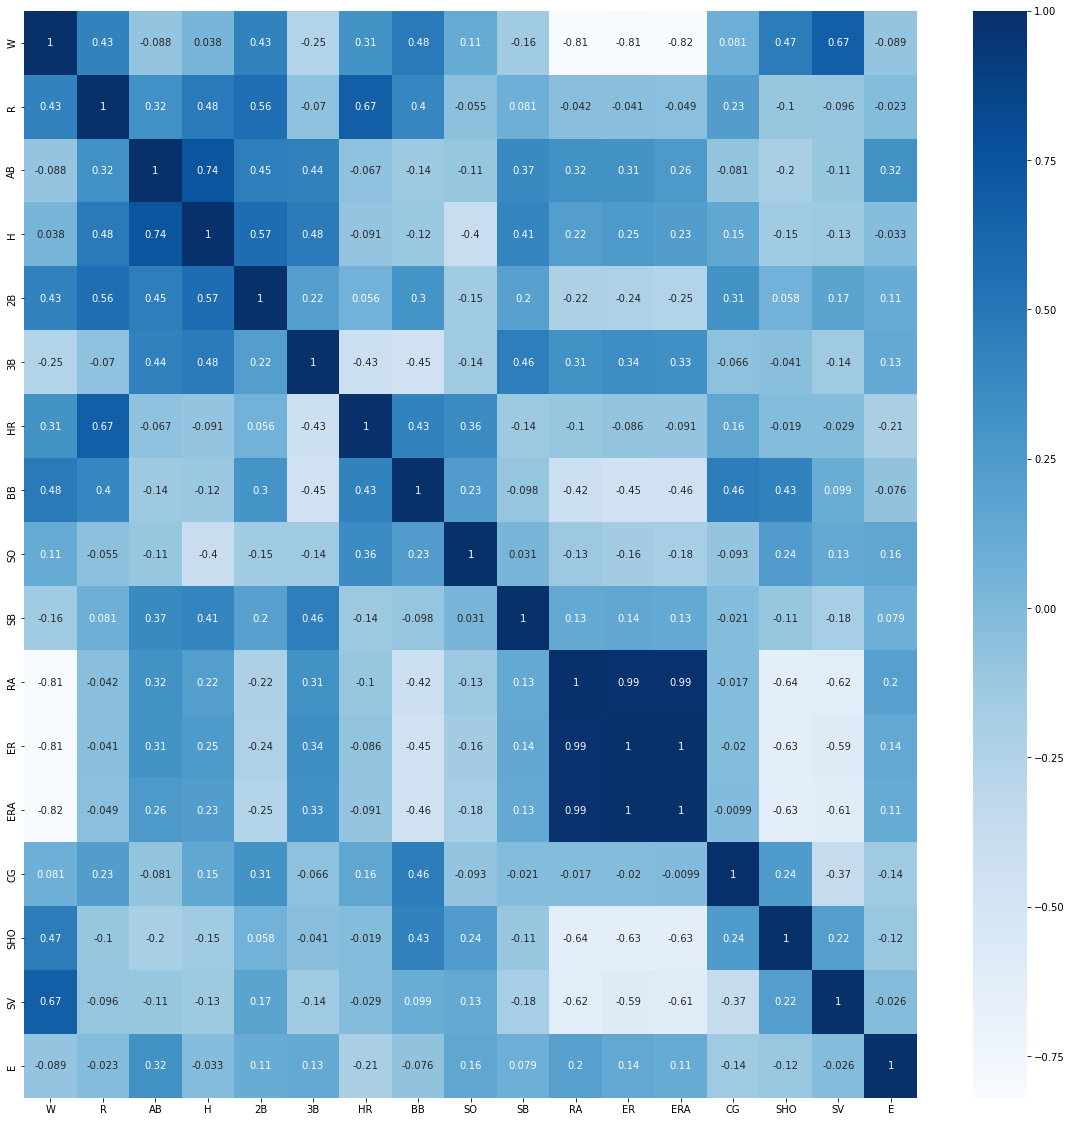

In [33]:
# Visualizing the correlation using heatmap.

plt.figure(figsize=(20,20))
sns.heatmap(base_data.corr(),annot=True,cmap='Blues')
plt.show()

Here we can see that the columns RA,ERA and ER have strong negative corelation with Target column W,and other feature columns shows slight correlationship with target column. 

Checking the outliers in the dataset using boxplot.

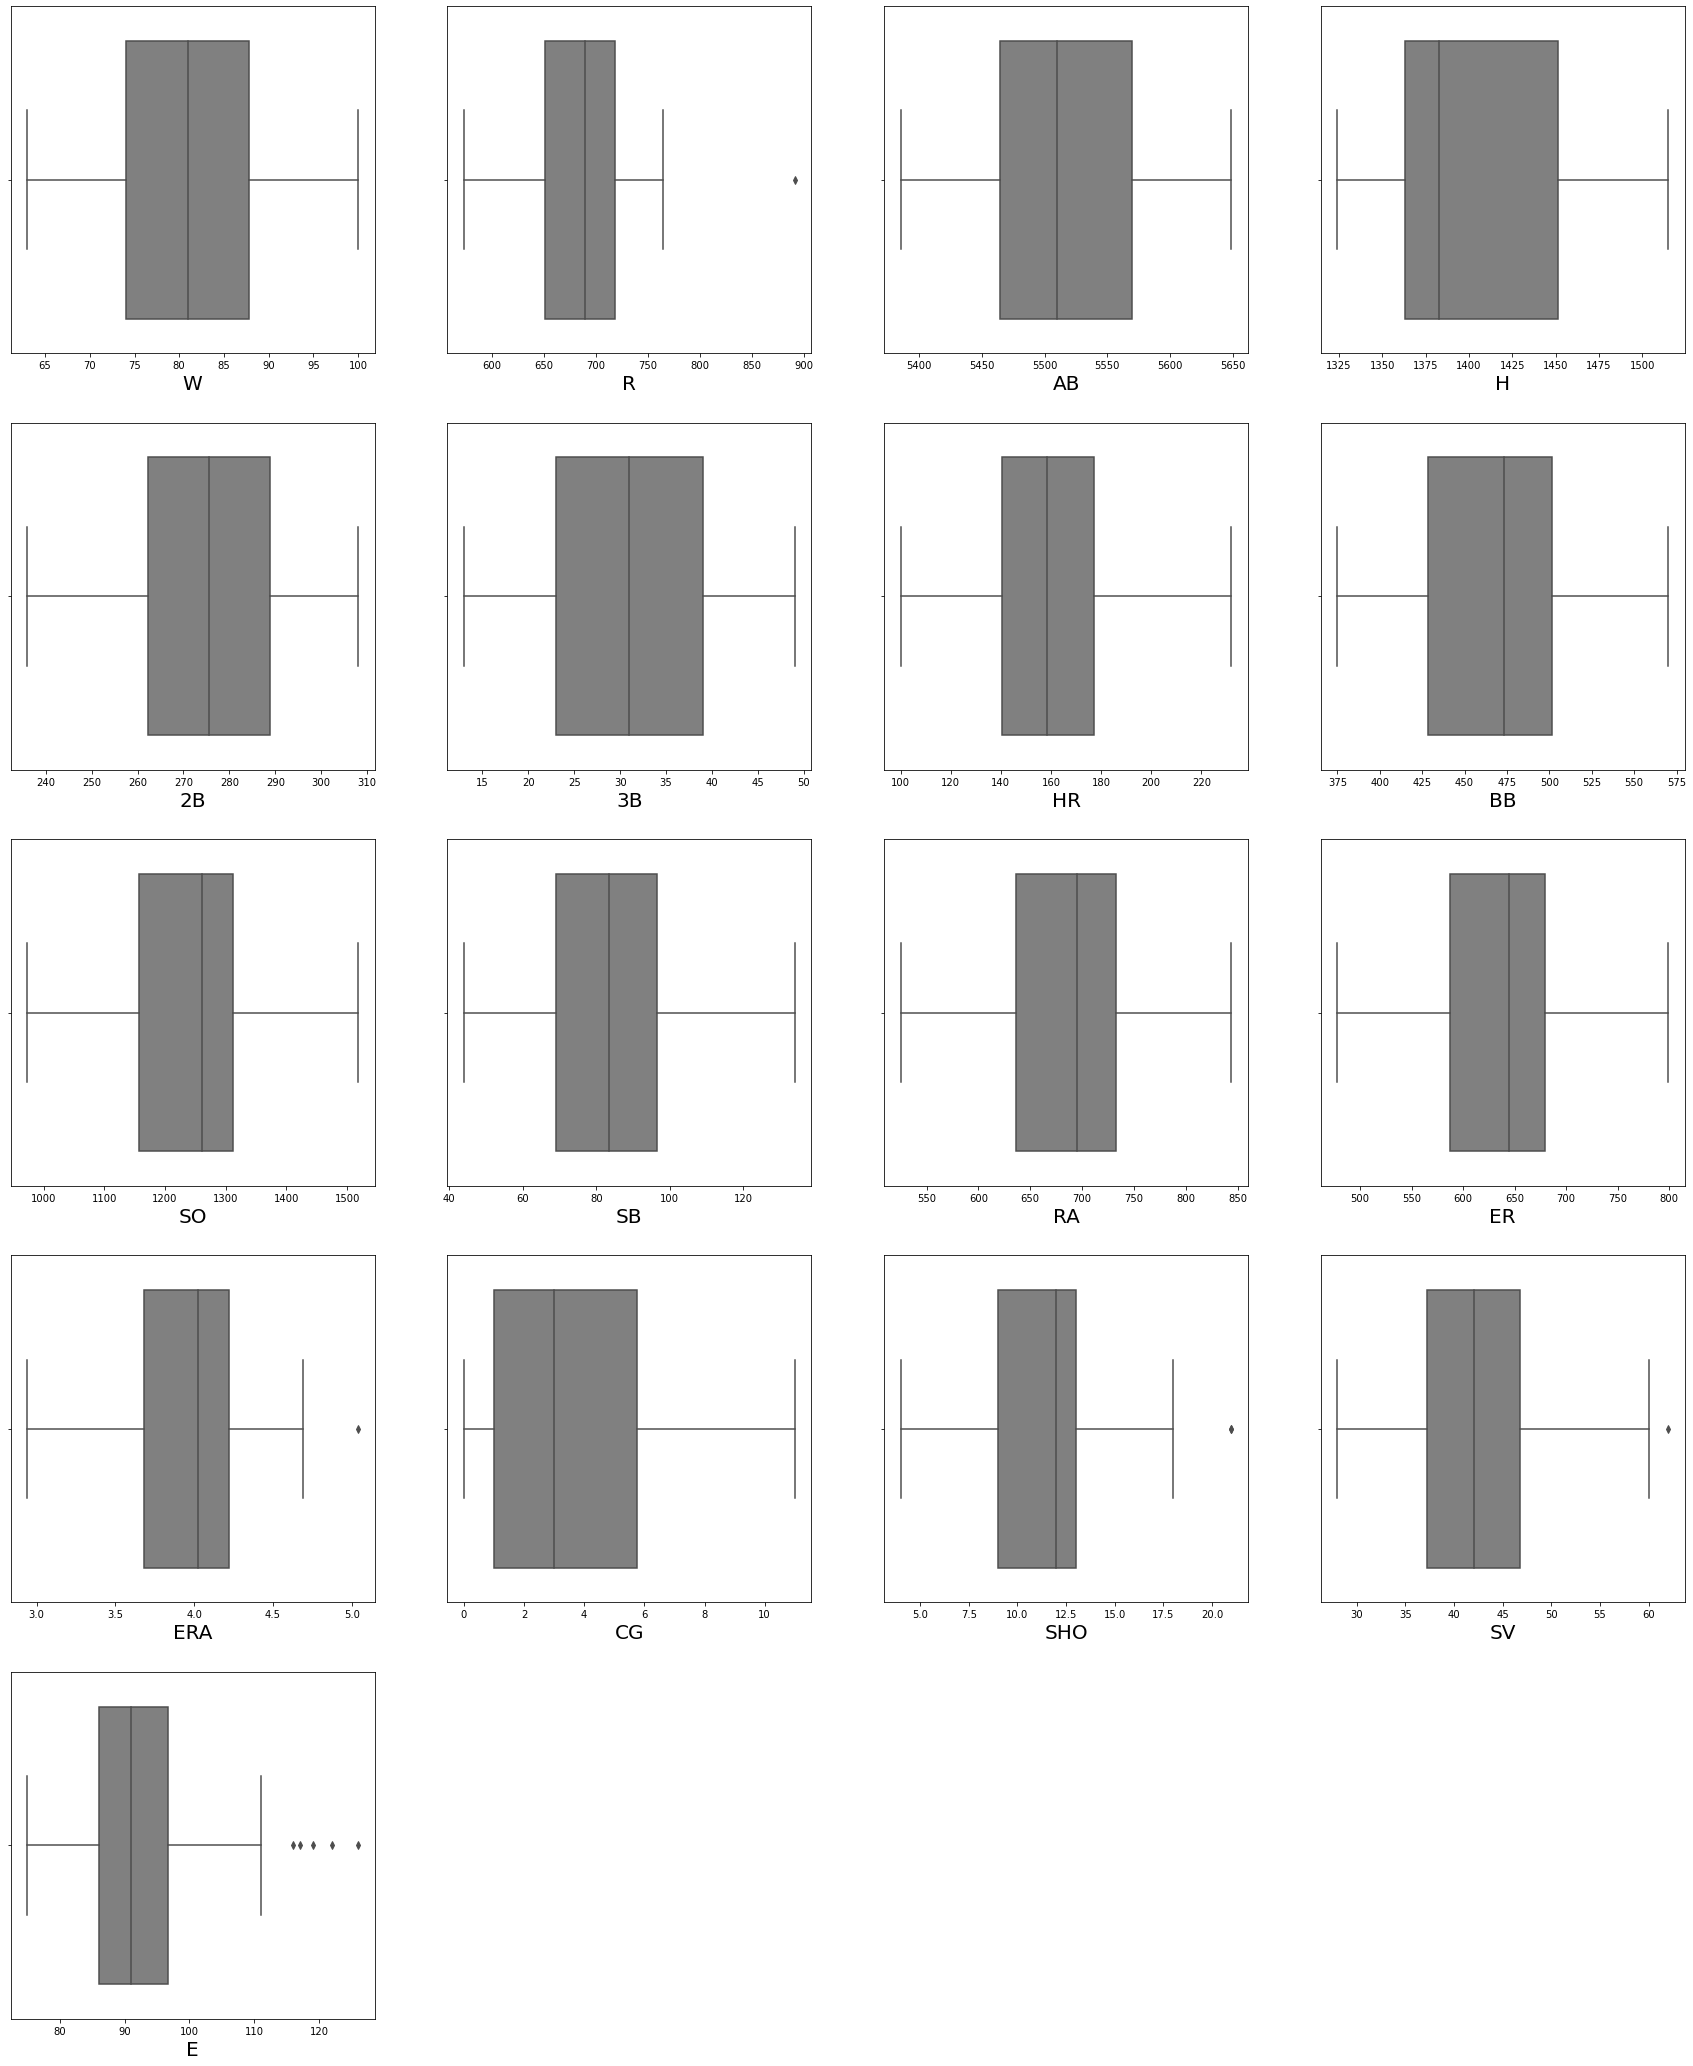

In [33]:
plt.figure(figsize=(30,60),facecolor='white')
plotnumber=1
 
for column in base_data:
    if plotnumber<=17:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(base_data[column],color='grey')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1   
plt.show()      

We can see that there are ouliers in R,ERA,SHO,SV and E. As we have Outliers in dataset wemust remove the ouliers.

# Data Cleaning

In [34]:
# Again checking null values

base_data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in the dataset.

Checking the outliers again combinely using the box plot.

<AxesSubplot:>

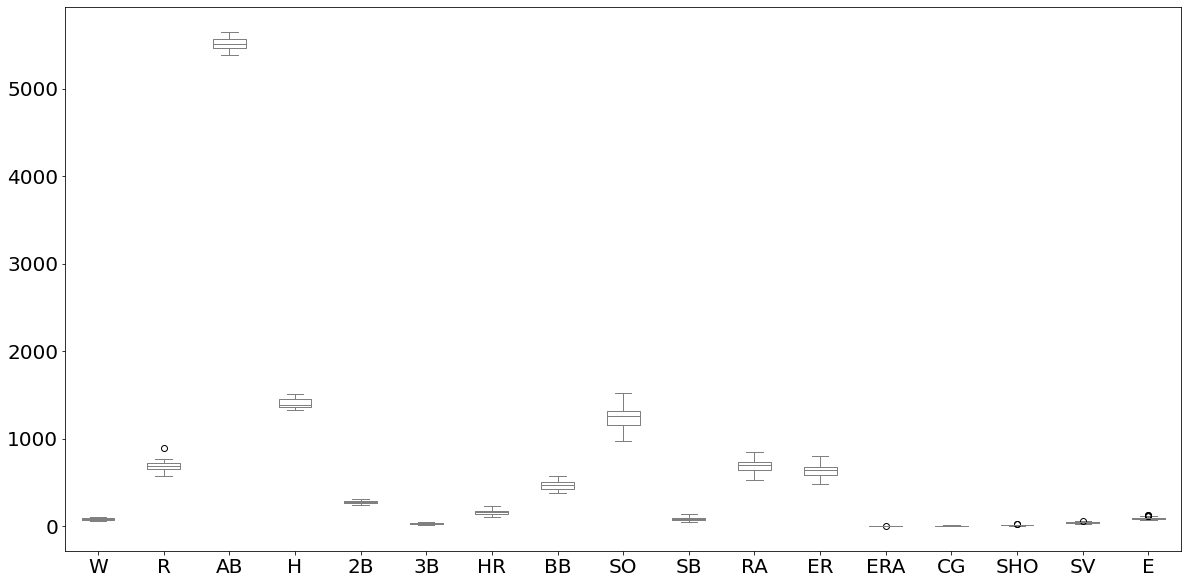

In [35]:
base_data.plot(kind='box',fontsize=20,figsize=(20,10),color='grey')

Here also we can see outlers in R,ERA,SHO,SV and E.

In [36]:
# We will separate the features having outliers to apply zscore on it. 

outliers=base_data[['R','ERA','SHO','SV','E']]

In [37]:
# We will treat these outliers using Zscore method.

from scipy.stats import zscore
z=np.abs(zscore(outliers))
df_new=base_data[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


We finally removed the outliers from the dataset.

In [38]:
# Dataset shape after outlier removal.
df_new.shape

(29, 17)

In [39]:
# Original shape of dataset.
base_data.shape

(30, 17)

In [40]:
# Data loss after outlier removal.
Data_loss=((30-29)/30)*100
Data_loss

3.3333333333333335

There is not that much data loss after outlier removal, it is not more than 10%.

# Checking The Skewness in Dataset.

In [41]:
# Checking skewness in the dataset.

df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

There is skewness in columns H,CG,SHO,SV and E.

In [42]:
# Removing skewness using log1p.
df_new["H"]=np.log1p(df_new["H"])

In [43]:
# Checking the skewness after skewness removal
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [44]:
# Using power tranformation method for skewness removal.
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [45]:
df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)


In [46]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

We successfully removed the skewness in dataset.

# Spliting the dataset into train and test. 

In [47]:
# x for features and y for target.
x=df_new.drop('W',axis=1)
y=df_new['W']

In [48]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,-0.307098,-0.787002,1.532753,-0.348265
1,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,-0.307098,0.236737,0.312020,-0.540820
2,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.011315,-0.252844,-0.664137,-1.326125
3,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,1.264463,-0.513555,-0.820689,0.650818
4,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,1.264463,0.236737,-1.149165,-0.540820
6,764,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,0.121871,-2.064039,0.677176,0.082858
7,713,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,-1.732896,-0.252844,0.052325,-1.588197
8,644,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,-0.870682,0.236737,1.908137,0.237592
9,748,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,0.121871,-0.252844,-0.365006,0.383386
10,751,5511,7.258412,279,32,172,503,1233,101,733,680,4.24,0.770649,-0.513555,0.312020,1.554265


In [49]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [51]:
ss=StandardScaler()
x_scaled= pd.DataFrame(ss.fit_transform(x), columns=x.columns)


In [52]:
x_scaled.head(5)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x_scaled.values, i) for i in range(x_scaled.shape[1])]
vif["Features"]=x_scaled.columns
vif

,vif_Features,Features
0,7.112342,R
1,20.237195,AB
2,10.114607,H
3,3.528059,2B
4,3.227808,3B
5,8.736960,HR
6,3.324550,BB
7,2.811546,SO
8,1.955254,SB
9,200.826177,RA


Here there is multicollinearity in RA,ERA and ER columns, so let's drop ERA column.

In [54]:
# Checking the data after applying VIF.

x_scaled=x_scaled.drop('ERA',axis=1)

In [55]:
x_scaled.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.264463,0.236737,-1.149165,-0.540820


In [56]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x_scaled.values, i) for i in range(x_scaled.shape[1])]
vif["Features"]=x_scaled.columns
vif

,vif_Features,Features
0,6.284899,R
1,5.450696,AB
2,8.635534,H
3,3.325947,2B
4,3.190296,3B
5,8.196433,HR
6,3.290850,BB
7,2.808312,SO
8,1.828701,SB
9,186.246952,RA


In [57]:
x_scaled=x_scaled.drop('RA',axis=1)

In [58]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x_scaled.values, i) for i in range(x_scaled.shape[1])]
vif["Features"]=x_scaled.columns
vif

,vif_Features,Features
0,6.095616,R
1,5.172720,AB
2,7.924801,H
3,3.237138,2B
4,3.056056,3B
5,6.308113,HR
6,3.046019,BB
7,2.243398,SO
8,1.739871,SB
9,4.655633,ER


Finally we successfully removed the multicollinearity present in the dataset. 

In [59]:
# Checking the Best Accuracy score on random state using linear regression model.

from sklearn.linear_model import  LinearRegression
lr=LinearRegression()

In [60]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr.fit(x_train,y_train)
    y_pred_train=lr.predict(x_train)
    y_pred_test=lr.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,y_pred_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,y_pred_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9768383015216393
At random state0, The test accuracy is :-0.49963681285927775


At random state1, The training accuracy is :-0.9762285427209911
At random state1, The test accuracy is :-0.18565756675520972


At random state2, The training accuracy is :-0.9638255316870868
At random state2, The test accuracy is :--0.2679901647388272


At random state3, The training accuracy is :-0.9677990948927815
At random state3, The test accuracy is :-0.6776697786661834


At random state4, The training accuracy is :-0.9680569379679669
At random state4, The test accuracy is :-0.7641316816583286


At random state5, The training accuracy is :-0.9612472010423034
At random state5, The test accuracy is :-0.6051495407609396


At random state6, The training accuracy is :-0.9723763056746941
At random state6, The test accuracy is :-0.7504731543294726


At random state7, The training accuracy is :-0.9610245315460946
At random state7, The test accuracy is :-0.31669541

The best accuracy score for training is 96% and for test it is 80% at random state 99.

# Model Building and Evaluation

In [116]:
# Importing necessary libraries.
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score


Model building using Linear regression algorithm.


In [62]:
# Model building using Linear Regression Algorithm.

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([61.22839912, 55.68366844, 91.10669068, 79.71286494, 88.66650706,
       95.11437125, 89.51852177])

In [119]:
# Checking the accuracy_score,MSE,MAE and r2_score for Linear Regression.

print('Accuracy Score for Linear Regression:', lr.score(x_train,y_train)*100)
print('MSE:',mean_squared_error(y_pred,y_test))
print('MAE:',mean_absolute_error(y_pred,y_test))
print('r2_score:',r2_score(y_pred,y_test))

Accuracy Score for Linear Regression: 96.33011594527375
MSE: 32.62857142857143
MAE: 5.085714285714287
r2_score: 0.2670089858793325


we got accuracy score of about 96% for Linear Regression.

In [64]:
# Model building using DecisionTree Algorithm.
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_pred

array([78., 64., 90., 88., 81., 90., 84.])

In [65]:
# Checking accuracy_score,MSE,MAE and r2_score for DecisionTree Regressor.

print('Accuracy Score for DecisionTree Regressor:', dt.score(x_train,y_train)*100)
print('MSE:',mean_squared_error(y_pred,y_test))
print('MAE:',mean_absolute_error(y_pred,y_test))
print('r2_score:',r2_score(y_pred,y_test))

Accuracy Score for DecisionTree Regressor: 100.0
MSE: 46.714285714285715
MAE: 5.285714285714286
r2_score: 0.3573834924199888


In [66]:
# Model building using RandomForest Algorithm.

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_pred

array([78., 64., 90., 88., 81., 90., 84.])

In [67]:
# Checking accuracy_score,MSE,MAE and r2_score for Random Forest Regressor.

print('Accuracy Score for RandomForest Regressor:', rf.score(x_train,y_train)*100)
print('MSE:',mean_squared_error(y_pred,y_test))
print('MAE:',mean_absolute_error(y_pred,y_test))
print('r2_score:',r2_score(y_pred,y_test))

Accuracy Score for RandomForest Regressor: 93.13008346512038
MSE: 46.714285714285715
MAE: 5.285714285714286
r2_score: 0.3573834924199888


In [68]:
# Model building using support Vector Regressor Algorithm.

svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
y_pred

array([80.48702845, 80.47270696, 80.50051317, 80.48474258, 80.50274161,
       80.50990757, 80.50104431])

In [69]:
# Checking accuracy_score,MSE,MAE and r2_score for SVR Regressor.

print('Accuracy Score for SVR Regressor:', svr.score(x_train,y_train)*100)
print('MSE:',mean_squared_error(y_pred,y_test))
print('MAE:',mean_absolute_error(y_pred,y_test))
print('r2_score:',r2_score(y_pred,y_test))

Accuracy Score for SVR Regressor: 0.1571465778790193
MSE: 135.43406341613192
MAE: 10.2043244771569
r2_score: -939451.7846532346


In [70]:
# Model building using KNeighbors Regressor Algorithm.

knn=KNN()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([76.2, 69.6, 89.8, 74. , 81.6, 87.2, 81.6])

In [71]:
# Checking accuracy_score,MSE,MAE and r2_score for KNN Regressor.

print('Accuracy Score for KNeighbors Regressor:', knn.score(x_train,y_train)*100)
print('MSE:',mean_squared_error(y_pred,y_test))
print('MAE:',mean_absolute_error(y_pred,y_test))
print('r2_score:',r2_score(y_pred,y_test))

Accuracy Score for KNeighbors Regressor: 45.838868388683885
MSE: 32.62857142857143
MAE: 5.085714285714287
r2_score: 0.2670089858793325


# Performing Cross Validation for each algorithm.

In [72]:
np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         SVR(kernel='linear'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         KNN()]

names = ['lr','svr','rf','dt','knn']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

lr   : 33.227142, 22.206678
svr   : 54.292689, 31.284378
rf   : 40.836785, 24.716511
dt   : 63.283333, 41.111370
knn   : 60.964667, 41.009441


According to cross validation's standard devivation score we got least std. score for linear regression algorithm i.e. 22.20 as compared to other algorithms.
Lower the standard deviation score lower will be the variance thats why I am choosing Linear Regression as my final model.

# Hyper Parameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

In [96]:
# Checking the Lasso's r2_score,mse,mae,rmse. 
params={'alpha':[0.001,0.01,0.1,1.0,10],'random_state':list(range(0,100))}
lo=Lasso()
reg=GridSearchCV(lo,params)
reg.fit(x_train,y_train)
print(reg.best_params_)


{'alpha': 10, 'random_state': 0}


In [115]:
lo=Lasso(alpha=1,random_state=0)
lo.fit(x_train,y_train)
pred=ls.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2_score: 0.8162585359689928
mse: 24.928841895472164
mae: 4.824282278813735
rmse: 4.992879118852384


In [ ]:
Here we get the lasso r2 score 81% which is quite good.

In [109]:
# Assingning the parameters.
params = {'alpha':[0.01,0.1,1.0,10],
            'selection':['cyclic','random'],
            'max_iter':[3,5,7,9,11],
            'tol':[100,1000],
            'fit_intercept':['bool'],
            'normalize':[True,False]          
         }

In [110]:
GSV=GridSearchCV(Lasso(),params,cv=5)

In [111]:
# Training the model using GridSearchCV.
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10],
                         'fit_intercept': ['bool'],
                         'max_iter': [3, 5, 7, 9, 11],
                         'normalize': [True, False],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [112]:
# Getting the best parameter.
GSV.best_params_

{'alpha': 0.01,
 'fit_intercept': 'bool',
 'max_iter': 11,
 'normalize': False,
 'selection': 'random',
 'tol': 1000}

Finalizing the model on basis of best parameters that we got using GridSearch CV. 

In [113]:
Finalize=Lasso(alpha=0.01, fit_intercept="bool", max_iter=11, selection="random", tol=1000)
Finalize.fit(x_train,y_train)
pred=Finalize.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 81.40543470979684
mean_squared_error: 25.227891846789937
mean_absolute_error: 4.076081082046715
RMSE value: 5.022737485354967


Here we got the mean squared error of approx.25% which is less that means that we are very much close to best fit line.
Here we got the mean absolute error of almost 4% which is very small that mean there is not much difference in our true values and predicted values.
Here we finally got out best fit model that is Linear Regression. 

# Saving the Best Model

In [120]:
#Saving the model using .pkl
import joblib
joblib.dump(Finalize,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']